In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [27]:
latent_dim = 100  # Dimensionality of the latent space
num_classes = 10  # Number of classes (e.g., for MNIST)

In [29]:
def build_generator():
    model = keras.Sequential([
        layers.Dense(7 * 7 * 128, input_dim=latent_dim + 10),  # Concatenate latent vector with label info
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7,7), activation='sigmoid', padding='same')
    ])
    return model

In [31]:
def build_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1 + num_classes)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [33]:
def build_cvae(encoder, generator):
           return mean + tf.exp(0.5 * log_var) * epsilon

import tensorflow as tf

In [34]:
class Sampling(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = keras.backend.random_normal(shape=tf.shape(mean))
        return mean + keras.backend.exp(0.5 * log_var) * epsilon


In [38]:
generator = build_generator()

In [39]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))
random_labels = np.eye(num_classes)[np.random.choice(num_classes, num_samples)]


In [41]:
latent_vectors_with_labels = np.concatenate([random_latent_vectors, random_labels], axis=1)

In [43]:
generated_images = generator.predict(latent_vectors_with_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


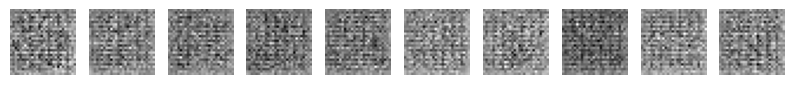

In [19]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()